# Data Wrangling project

Your tasks in this project are as follows:

Data wrangling, which consists of:
- Gathering data
- Assessing data
- Cleaning data
- Storing, analyzing, and visualizing your wrangled data

Reporting on :
1. your data wrangling efforts
2. your data analyses and visualizations

Gathering Data for this Project

Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually.

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

**Note: do not include your Twitter API keys, secrets, and tokens in your project submission.**


In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
def pv(variable):
    if(len(variable)>1): print(variable, ":", eval(variable))

### Read The WeRateDogs Twitter archive


In [2]:
!file twitter-archive-enhanced.csv
!head -c200 twitter-archive-enhanced.csv
!tail -c200 twitter-archive-enhanced.csv

twitter-archive-enhanced.csv: HTML document, UTF-8 Unicode text, with very long lines
tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name, Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,,,,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [3]:
import pandas as pd
df_twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

## Read Image prediction

In [4]:
import requests
import os
folder_name = "./"
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
pred_filename = url.split('/')[-1]
response = requests.get(url)
with open(os.path.join(folder_name, pred_filename), mode='wb') as file:
    file.write(response.content)
print("File retreived")
import pandas as pd
df_pred = pd.read_csv(folder_name + pred_filename, sep="\t")

335079

File retreived


### Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
We will call the Twitter API for every Tweet we have in df_twitter_archive_enhanced.tweet_id and add the information to our existing Pandas dataset.



In [5]:
'''Installing Tweepy'''
#!pip install tweepy

'Installing Tweepy'

In [6]:
'''Create a config file to store the credentials.'''
# import configparser
# config = configparser.ConfigParser()
# config['TWITTER'] = {'consumer_key': '45',
#                     'consumer_secret': 'yes',
#                     'access_token': 'yes',
#                     'access_secret': '9'}
# with open('config.ini', 'w') as configfile:
#     config.write(configfile)


'Create a config file to store the credentials.'

In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from tqdm import tqdm # For progress bar
import configparser

tweets_filename = "tweet_json.txt"
'''It's taking a long time, don't do it again !'''
# raise KeyboardInterrupt

# # We will read them from a file that won't be commited.
# config = configparser.ConfigParser()
# _ = config.read('config.ini');
# consumer_key = config['TWITTER']['consumer_key']
# consumer_secret = config['TWITTER']['consumer_secret']
# access_token = config['TWITTER']['access_token']
# access_secret = config['TWITTER']['access_secret']

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# tweet_ids = df_twitter_archive_enhanced.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open(tweets_filename, 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tqdm(tweet_ids):
#         count += 1
#         #print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             #print("Success")
#             _ = json.dump(tweet._json, outfile)
#             _ = outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

"It's taking a long time, don't do it again !"

In [8]:
print("1862.885395293939 seconds = ",1862.885395293939/60, "minutes")
#print("Time alapse:",(end - start)/60, "minutes")
#print("Number of errors:", len(fails_dict))
#print("Errors:\n", "{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 845459076796616705: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 842892208864923648: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 837012587749474308: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 827228250799742977: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 812747805718642688: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 802247111496568832: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 775096608509886464: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 770743923962707968: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 754011816964026368: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 680055455951884288: TweepError([{'code': 144, 'message': 'No status found with that ID.'}])}")
#!ls

1862.885395293939 seconds =  31.048089921565648 minutes


We have 17 errors, due to missing tweet, probably deleted.

Trying to access it via https://twitter.com/dog_rates/status/888202515573088257 says "Sorry, that page doesn’t exist!"

### Load twitter information

Let's see what we have in the file :

In [9]:
!file tweet_json.txt
!head -c200 tweet_json.txt
!tail -c200 tweet_json.txt

tweet_json.txt: HTML document, ASCII text, with very long lines
{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.ull, "is_quote_status": false, "retweet_count": 496, "favorite_count": 2514, "favorited": false, "retweeted": false, "possibly_sensitive": false, "possibly_sensitive_appealable": false, "lang": "en"}


It's JSON data, but with missing opening { at the begining and missing closing } at the end.
So we will read it line by line to process the JSON line-by-line and add them to a Pandas Dataframe.


In [10]:
import pandas as pd

import json
# Create an array to receive the data
tweets = []
with open(tweets_filename, 'r') as infile:
    for line in infile:
        data = json.loads(line)
        # Create a dictionnary from JSON data and add them to the array
        tweets.append(dict(tweet_id=data["id"],
                               retweet_count=data["retweet_count"],
                               favorite_count=data["favorite_count"]))
# Load the array in a Dataframe
df_tweets = pd.DataFrame(tweets)
# Delete the array to save memory
del tweets
#df_tweets.head(3)
df_tweets.shape

# Pandas has a methode "read_json" than could do that for us, with the parameter "lines=True".
# It works with tweet-json.txt but not with my tweet_json-bco.txt
# df_tweets = pd.read_json(tweets_filename, lines=True)
# df_tweets.head(3)
# df_tweets.shape

(2339, 3)

It works. We know have 2 339 lines with 3 columns.

## Assessing Data for this Project

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least :
- eight (8) quality issues
- two (2) tidiness issues

In [11]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Check : All lines have values in them.
And their types where correctly identified.

In [12]:
df_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


min and max of prediction are well in 0-1 range, as expected. And confidence decrease from first to third prediction.

In [13]:
df_pred.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
beagle                        18
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
teddy                         18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

We saw that some entry have nothing to with dogs : minibus, fountain, desktop_computer, ...
But we could identify them with the column "p1_dog".

In [14]:
df_pred.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

So, off 2 750 picture, 543 are identified as not dog.

In [15]:
df_pred.query("p1_dog == True")["p1"].value_counts()

golden_retriever               150
Labrador_retriever             100
Pembroke                        89
Chihuahua                       83
pug                             57
chow                            44
Samoyed                         43
toy_poodle                      39
Pomeranian                      38
malamute                        30
cocker_spaniel                  30
French_bulldog                  26
Chesapeake_Bay_retriever        23
miniature_pinscher              23
Staffordshire_bullterrier       20
German_shepherd                 20
Siberian_husky                  20
Cardigan                        19
Maltese_dog                     18
Eskimo_dog                      18
beagle                          18
Shetland_sheepdog               18
Rottweiler                      17
Shih-Tzu                        17
Lakeland_terrier                17
Italian_greyhound               16
kuvasz                          16
West_Highland_white_terrier     14
Great_Pyrenees      

That looks like dog's bread.
Some have capital letter at the beginningn some don't, we could easily change that.

In [16]:
'''
Check the datasets sizes
'''
pv("len(df_twitter_archive_enhanced)")
pv("len(df_tweets)")
pv("len(df_pred)")
pv("len(df_twitter_archive_enhanced) - len(df_tweets)")

'\nCheck the datasets sizes\n'

len(df_twitter_archive_enhanced) : 2356
len(df_tweets) : 2339
len(df_pred) : 2075
len(df_twitter_archive_enhanced) - len(df_tweets) : 17


We do not have the same size for all dataset.

Differences between df_twitter_archive_enhanced and df_tweets are the 17 deleted tweets.

Image prediction is the smallest dataset. But still above 2 000, so we could do a strict merge and keep only the matching tweet ID of every dataset.

But, image prediction are done for every image in the tweet, as we could have up to 4 images for a tweet we will not merge it, instead we will keep it appart, and use the tweet_id as a key.

In [17]:
'''
We are going to merge the df_twitter_archive_enhanced and df_tweets datasets in one.
'''
print("Archive enhanced :")
#df_twitter_archive_enhanced.head(3)
df_twitter_archive_enhanced.columns
print("From tweeter API : ")
#df_tweets.head(3)
df_tweets.columns
print("Image prediction : ")
#df_pred.head(3)
df_pred.columns
df_pred.shape


df_twitter_all = pd.merge(df_twitter_archive_enhanced, df_tweets, on='tweet_id')
#df_twitter_all.head(3)
df_twitter_all.shape


'\nWe are going to merge the df_twitter_archive_enhanced and df_tweets datasets in one.\n'

Archive enhanced :


Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

From tweeter API : 


Index(['favorite_count', 'retweet_count', 'tweet_id'], dtype='object')

Image prediction : 


Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

(2075, 12)

(2339, 19)

In [18]:
df_twitter_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339 entries, 0 to 2338
Data columns (total 19 columns):
tweet_id                      2339 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2339 non-null object
source                        2339 non-null object
text                          2339 non-null object
retweeted_status_id           167 non-null float64
retweeted_status_user_id      167 non-null float64
retweeted_status_timestamp    167 non-null object
expanded_urls                 2280 non-null object
rating_numerator              2339 non-null int64
rating_denominator            2339 non-null int64
name                          2339 non-null object
doggo                         2339 non-null object
floofer                       2339 non-null object
pupper                        2339 non-null object
puppo                         2339 non-null object
favorite_count                23

- timestamp and retweeted_status_timestamp are "object" (i.e. string) so we will have to convert them to datetime.
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id  are Float64, why not Int64 ?


### Automatic select column to check
Check the number of disctinct values in every columns, then add the column to a list if they are less than 50 distinct values.

So we could display them.

In [19]:
columns = df_twitter_all.columns
to_be_removed = []
for column in columns:
    nb_unique_values = eval('df_twitter_all.' + column + '.nunique()')
    print("Distinct values in", column, ":", nb_unique_values)
    if nb_unique_values > 50:
        to_be_removed.append(column)
print("\nColumn with too many distinct values :\n", to_be_removed)

Distinct values in tweet_id : 2339
Distinct values in in_reply_to_status_id : 77
Distinct values in in_reply_to_user_id : 31
Distinct values in timestamp : 2339
Distinct values in source : 4
Distinct values in text : 2339
Distinct values in retweeted_status_id : 167
Distinct values in retweeted_status_user_id : 23
Distinct values in retweeted_status_timestamp : 167
Distinct values in expanded_urls : 2208
Distinct values in rating_numerator : 40
Distinct values in rating_denominator : 18
Distinct values in name : 956
Distinct values in doggo : 2
Distinct values in floofer : 2
Distinct values in pupper : 2
Distinct values in puppo : 2
Distinct values in favorite_count : 1986
Distinct values in retweet_count : 1715

Column with too many distinct values :
 ['tweet_id', 'in_reply_to_status_id', 'timestamp', 'text', 'retweeted_status_id', 'retweeted_status_timestamp', 'expanded_urls', 'name', 'favorite_count', 'retweet_count']


In [20]:
'''
Display distinct values
'''
columns_redux = [item for item in columns if item not in to_be_removed ]
for column in columns_redux:
    print("Distinct values in", column)
    eval('df_twitter_all.' + column + '.value_counts()')

'\nDisplay distinct values\n'

Distinct values in in_reply_to_user_id


4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.916630e+07     1
3.105441e+09     1
2.918590e+08     1
2.792810e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
3.589728e+08     1
8.405479e+17     1
2.894131e+09     1
2.143566e+07     1
2.281182e+09     1
1.648776e+07     1
4.717297e+09     1
2.878549e+07     1
1.582854e+09     1
4.670367e+08     1
4.738443e+07     1
1.361572e+07     1
1.584641e+07     1
2.068372e+07     1
1.637468e+07     1
1.185634e+07     1
1.198989e+09     1
1.132119e+08     1
7.759620e+07     1
Name: in_reply_to_user_id, dtype: int64

Distinct values in source


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2205
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

Distinct values in retweeted_status_user_id


4.196984e+09    144
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

Distinct values in rating_numerator


12      554
11      464
10      459
13      344
9       157
8       102
7        55
14       51
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Distinct values in rating_denominator


10     2317
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Distinct values in doggo


None     2243
doggo      96
Name: doggo, dtype: int64

Distinct values in floofer


None       2329
floofer      10
Name: floofer, dtype: int64

Distinct values in pupper


None      2083
pupper     256
Name: pupper, dtype: int64

Distinct values in puppo


None     2309
puppo      30
Name: puppo, dtype: int64

With the above we already see some issues :
- "source" include HTML tag, but even without them, it do not seems of any use, I think there is not the values we expected in it.
- rating_numerator and rating_denominator need a closer look.
- Dog stages are in separate column
- Dog stages have few values

In [21]:
'''
Show 15 most given names
'''
import itertools
# Thanks to https://stackoverflow.com/questions/36106712/how-can-i-limit-iterations-of-a-loop-in-python
for name, cnt in itertools.islice(df_twitter_all.name.value_counts().iteritems(),0,15):
      print(name, cnt)

'\nShow 15 most given names\n'

None 738
a 55
Lucy 11
Cooper 11
Oliver 11
Charlie 11
Lola 10
Penny 10
Tucker 10
Winston 9
Bo 9
Sadie 8
the 8
Daisy 7
an 7


"None" is missing name, they are many of them, looking at the file in a editor, they seems to be extracted only with the pattern "This is &lt;dog_name&gt;".

In [22]:
'''
Show names with less than 3 caracters to check them.
'''
names = df_twitter_all.name.value_counts()
# Thanks to https://stackoverflow.com/questions/36973387/accessing-first-column-of-pandas-value-counts
for name, cnt in names.iteritems():
    if len(name)<3:
        print(name, cnt)

'\nShow names with less than 3 caracters to check them.\n'

a 55
Bo 9
an 7
my 1
Ed 1
JD 1
O 1
Jo 1
by 1
Al 1
Mo 1


We can see that "a", "an", "by", "my", "the", "O" are not the names of the dogs. But explained by the fact only ther first word after "This is" is extracted.

In [23]:
'''
Have a look to notation outliers
'''
df_twitter_rating_numerator = df_twitter_all.query("rating_numerator < 11 or rating_numerator > 15")
df_twitter_rating_denominator = df_twitter_all.query("rating_denominator != 10")
df_twitter_rating_numerator.rating_numerator.value_counts()
df_twitter_rating_denominator.rating_denominator.value_counts()

'\nHave a look to notation outliers\n'

10      459
9       157
8       102
7        55
5        37
6        32
3        19
4        17
1         9
2         9
75        2
0         2
420       2
27        1
17        1
20        1
24        1
26        1
960       1
44        1
1776      1
50        1
60        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
666       1
45        1
Name: rating_numerator, dtype: int64

50     3
20     2
80     2
11     2
90     1
40     1
130    1
2      1
70     1
7      1
110    1
170    1
120    1
15     1
16     1
150    1
0      1
Name: rating_denominator, dtype: int64

The notations are not always between 11 and 14 like we expect, let's have a closer look.

In [24]:
'''
Have a closer look to notation outliers
'''
df_poor_notation = df_twitter_all.loc[df_twitter_all['rating_numerator'] > 50]
#df_poor_notation = df_poor_notation[['tweet_id', 'rating_numerator', 'text']]

for tweet in df_poor_notation['text'][:5]:
    print("------------------------------------------\ntweet :", tweet)

df_poor_notation = df_twitter_all.loc[df_twitter_all['rating_denominator'] != 10]
#df_poor_notation = df_poor_notation[['tweet_id', 'rating_numerator', 'text']]

for tweet in df_poor_notation['text'][:5]:
    print("------------------------------------------\ntweet :", tweet)

'\nHave a closer look to notation outliers\n'

------------------------------------------
tweet : @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
------------------------------------------
tweet : @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
------------------------------------------
tweet : @markhoppus 182/10
------------------------------------------
tweet : @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
------------------------------------------
tweet : RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
------------------------------------------
tweet : @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
------------------------------------------
tweet : @docmisterio account started on 11/15/15
-----------------------

We saw that the outliers are real notation, given the fact that the whole thing is a joke.
There is few extraction errors :
- At least we could correct the notation extration to properly get decimal notation like "9.75".
- Sometimes there is more than one notation in a sentence. We could keep the last as the right notation.
- Sometimes a fraction is used and took as a notation but is not : for exemple "1/2 legged"

- We saw than some tweet have there short url in it, at the end, that is useless.


### Quality issues

To sum up, I found all these quality issues with content :

1. rating_denominator containt some values different from "10". But looking at the concerned tweets some are "real" notation.
2. rating_numerator have values from 0 to 420.
3. Some tweet have theyre short url included, at the end, that is useless.
4. Dog names are often None, because they seems to be extracted only with the pattern "This is <dog_name>"
5. Dog stages are often None. 
6. Retweets has to be removed
7. "source" include HTML tag, but even without them, it do not seems of any use, I think there is not the values we expected in it.
8. timestamp and retweeted_status_timestamp are "object" (i.e. string) so we will have to convert them to datetime. 
9. 17 tweet have been deleted.
10. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id have been incorectly stored as Float64,  with values like 8.862663570751283e+17 or 2281181600.0
11. Dogs names are wrongly extracted with name like "a", "an", "by", "my", "the" and "O".
12. rating_numerator incorectly extract decimal notation "9.75" became "75".
13. Sometimes there is more than one notation in a sentence. Looking at tweets the provided extraction took the first notation but it seeems better to keep the last.
14. Sometimes a fraction is used and took as a notation but is not : for exemple "1/2 legged"
15. Sometimes more than one dog is concerned : "Here we have Burke (pupper) and Dexter (doggo)"
16. None is stored as a string and not as None Type, nor NaN.
17. Duplicated urls in expanded_urls



### Tidiness issues
These are issues with structure that prevent easy analysis. Untidy data is also known as **messy data**. Tidy data requires:
- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.

Most commont problems :
- Column headers are values, not variable names.
- Multiple variables are stored in one column.
- Variables are stored in both rows and columns.
- Multiple types of observational units are stored in the same table.
- A single observational unit is stored in multiple tables.


I've found the following tidiness issues :
1. expanded_urls may contain up to 4 comma separated url to the images. We better have to put them in another table. The same as prediction on images.
2. The dog stages is not in a usefull format, having as many column as dog type like "doggo, floofer, pupper, puppo". So we better have to put it in one column "dog_stages". If we want to train a model we still could create dummies variables from the new columns.



# Cleaning

We first make a copy of the data set

In [25]:
df_twitter_clean = df_twitter_all.copy()

## Remove URLs in tweets
We saw than some tweet have there short url in it.

We are going to remove all url in tweets.

Warning : it may not be what we want if we want to compute some real link posted in a tweet. If so we could change the regexp to get only the url at the end.

In [26]:
import re
# RegExp to find URLs from http://www.noah.org/wiki/RegEx_Python#URL_regex_pattern
pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

# Define a methode to remove all the URLs in a string.
def remove_url(text):
    notations = re.finditer(pattern, text) # search for first, finditer for all
    # We have a for loop because sometimes there are more than one url.
    for notation in notations:
        text = text.replace(notation.group(), '')
    return text

# Apply the method to all 
df_twitter_clean = df_twitter_clean.drop('text', axis=1)
df_twitter_clean['text'] = df_twitter_all['text'].apply(remove_url)

#### Test
We do a loop over the cleaned text to check if they are no more URL

In [27]:
# Check it has worked on all url
fail = False
for tweet in df_twitter_clean['text']:
    notations = re.search(pattern, tweet)
    if notations:
        print("ERROR, still URL")
        fail = True
        print(notations.group())
        print("notation:", notation)
if not fail:
    print("All URLs removed !")

All URLs removed !


## Cleaning notation


rating_denominator containt some values different from "10". But looking at the concerned tweets these are "real" notation.

rating_numerator have values from 0 to 420. Only few of them are extraction mistake, like this one where a 9.5/10 became a 5/10 :
"I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace"
Or missreading when more than one notation :
"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

@dog_rates sometime goes out of it classic notation between 11 to 15 :
"His goodness shines through. 666/10"
"He's quite simply America af. 1776/10"

So I will programaticaly corrected the few real extraction errors. We will use a better regex to extract the notation.

But if we want to do calculus one the notation, it seems fair to remove the outlier made of jokes to keep only the common notation from 11 to 15. It could be simply done with :
df_twitter_tmp = df_twitter_all.query("rating_numerator > 10 and rating_numerator <= 15 and rating_denominator == 10")
But as these are jokes anyway, we have to think if it make any sense to do calculus.

Reminder :
**The fact that the rating numerators are greater than the denominators does not need to be cleaned.** This unique rating system is a big part of the popularity of WeRateDogs.

In [28]:
# Get the new notation
# Thanks to http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/
#  for how to apply a method to a whole row and save back the result
notation_pattern = re.compile(r'(?=\d)\d*\.?\d+/\d*\.?\d+') # RegExp to extract notation that handle decimal.
def get_rating_numerator(row):
    rating = None
    notations = re.finditer(notation_pattern, row['text'])
    #print(row['text'])
    if notations:
        for one_notation in notations:
            notation = one_notation.group()
            #print("Notation found:", notation)
            rating = float(notation.split('/')[0])
            #print("get_rating_numerator", rating)
    else:
        print("No notation !!!")
        rating = None
    return rating

def get_rating_denominator(row):
    notations = re.finditer(notation_pattern, row['text'])
    rating = None
    if notations:
        for one_notation in notations:
            notation = one_notation.group()
            #print("Notation found:", notation)
            rating = float(notation.split('/')[1])
            #print("get_rating_denominator", rating)
    else:
        print("No notation !!!")
    return rating

#df_poor_notation = df_twitter_all.loc[df_twitter_all['rating_numerator'] > 50]

df_twitter_clean['new_rating_numerator'] = df_twitter_all.apply(get_rating_numerator, axis=1)
df_twitter_clean['new_rating_denominator'] = df_twitter_all.apply(get_rating_denominator, axis=1)

#### Test

In [29]:
df_temp = df_twitter_clean.query("rating_numerator != new_rating_numerator or rating_denominator != new_rating_denominator")

import itertools
# Thanks to https://stackoverflow.com/questions/36106712/how-can-i-limit-iterations-of-a-loop-in-python
for index, row in itertools.islice(df_temp[['new_rating_numerator', 'new_rating_denominator', 'text','rating_numerator', 'rating_denominator']].iterrows(),0,5):
    print("---\n", row['rating_numerator'], '/', row['rating_denominator'], "is now", row['new_rating_numerator'], '/', row['new_rating_denominator'], " Text :",row['text'])


---
 5 / 10 is now 13.5 / 10.0  Text : This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 
---
 17 / 10 is now 13.0 / 10.0  Text : @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
---
 960 / 0 is now 13.0 / 10.0  Text : @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
---
 75 / 10 is now 9.75 / 10.0  Text : RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 …
---
 12 / 10 is now 11.0 / 10.0  Text : RT @dog_rates: "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing 


Well, it looks good, but I'm not sure taking the last notation is better than the first.


## Clean Dog Name

We begin by showing the none

In [30]:
import itertools
# Thanks to https://stackoverflow.com/questions/36106712/how-can-i-limit-iterations-of-a-loop-in-python
for index, row in itertools.islice(df_twitter_all.query("name == 'None'")[['name', 'text']].iterrows(),0,3):
    print("---\n", row['name'], '/', row['text'])

---
 None / Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
---
 None / When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
---
 None / Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm


Here are the patterns we are looking for :

    Here we have Pancho
    This is Spark
    This is O'Malley
    Meet Hank
    This a Norwegian Pewterschmidt named Tickles
    Here we have an Azerbaijani Buttermilk named Guss
    This lil pup is Oliver
    Their names are Cupit and Prencer
    Say hello to 

There are not often a name when given None, but let's to try to do better.

In [31]:
# Regex to get the name, tryed on https://pythex.org/
name_pattern = re.compile(r"(?:named| is|[mM]eet|have| are| hello to) [A-Z]'*[a-zA-Záàâäãåçéèêëíìîïñóòôöõúùûüýÿæœ]+")
# Method to get the name from a row
def get_dog_name(row):
    name = 'None'
    names = re.finditer(name_pattern, row['text'])
    one_name = 'None'
    for one_name in names:
        name = one_name.group()
        #print(name)
        name = name.split(' ')[-1]
    if one_name is None:
        #print("No name !!!")
        name = 'None'
    return name

df_twitter_clean['new_name'] = df_twitter_all.apply(get_dog_name, axis=1)

The regex is quite complicated because we handle the special name O'Maley and Oliviér for exemple.

But not "Big Jumpy Rat" for exemple. Nor "This is Amy. She is Queen" where we get Queen instead of Amy.
All in all, it is much better.

### Test

In [32]:
for index, row in df_twitter_clean.query("new_name != name")[['name' ,'new_name', 'text']][:10].iterrows():
    #print("---\n", type(row['name']), row['name'], '=>', row['new_name'], type(row['new_name']), row['text'])
    print("\n", row['name'], '=>', row['new_name'], " Tweet:", row['text'])


 such => None  Tweet: I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) 

 None => Howard  Tweet: I have a new hero and his name is Howard. 14/10 

 a => None  Tweet: Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) 

 None => Zoey  Tweet: Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 

 quite => None  Tweet: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 

 quite => None  Tweet: Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective 

 None => Blue  Tweet: RT @dog_rates: I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10

…

 not => No

## Dog stages are often None. 

In [33]:
# Regex to get the name, tryed on https://pythex.org/
#name_pattern = re.compile(r"(?:named| is|[mM]eet|have| are| hello to) [A-Z]'*[a-zA-Záàâäãåçéèêëíìîïñóòôöõúùûüýÿæœ]+")
# Method to get the name from a row
def get_dog_stage(row):
    names_to_find = ['pupper', 'doggo', 'floofer', 'puppo']
    for to_find in names_to_find:
        if row['text'].lower().find(to_find) != -1:
            #print(to_find)
            return to_find
    return None

df_twitter_clean['new_stages'] = df_twitter_all.apply(get_dog_stage, axis=1)
df_twitter_clean['new_stages'].value_counts()

df_twitter_clean['pupper'].value_counts()
df_twitter_clean['doggo'].value_counts()
df_twitter_clean['floofer'].value_counts()
df_twitter_clean['puppo'].value_counts()

pupper     282
doggo       94
puppo       36
floofer      9
Name: new_stages, dtype: int64

None      2083
pupper     256
Name: pupper, dtype: int64

None     2243
doggo      96
Name: doggo, dtype: int64

None       2329
floofer      10
Name: floofer, dtype: int64

None     2309
puppo      30
Name: puppo, dtype: int64

We get more pupper and puppo, but less doggo and floofer. Why ?

In [34]:
def check_dog_stage(row):
    # Test the case we found nothing and previous algo found it
    if not row['new_stages']:
        if row['pupper'] != 'None': print("pupper != None : " + row['text'])
        if row['doggo'] != 'None': print("doggo != None : " + row['text'])
        if row['puppo'] != 'None': print("puppo != None : " + row['text'])
        if row['floofer'] != 'None': print("flooter != None : " + row['text'])
    # Test the case we found something
    if row['new_stages']:
        if row['new_stages'] != row[str(row['new_stages'])]:
            #print(row[str(row['new_stages'])] + "!="+ row['new_stages'] + " : " + row['text'])
            print(row[str(row['new_stages'])] + "!="+ row['new_stages'])
            return row['new_stages'] + " : " + row['text']
    else:
        return None

_ = df_twitter_clean.apply(check_dog_stage, axis=1)


None!=pupper
None!=doggo
None!=puppo
None!=puppo
None!=puppo
None!=puppo
None!=doggo
None!=puppo
None!=puppo
None!=doggo
None!=doggo
None!=doggo
None!=pupper
None!=puppo
None!=doggo
None!=doggo
None!=doggo
None!=doggo
None!=pupper
None!=pupper
None!=pupper
None!=doggo
None!=pupper
None!=pupper
None!=pupper
None!=pupper
None!=pupper
None!=pupper
None!=pupper
None!=pupper
None!=pupper
None!=pupper
None!=pupper
None!=pupper
None!=pupper
None!=pupper
None!=pupper
None!=pupper
None!=pupper
None!=pupper
None!=pupper
None!=pupper
None!=pupper


Our extraction seems to work well. But there is another option : multiple values for the same raw.

### Test

Let check it.

In [35]:
def merge_dog_stage(row):
   if row['pupper'] != 'None':
    if row['doggo'] != 'None' or row['puppo'] != 'None' or row['floofer'] != 'None':
        print('ERROR : multiple values for :', row['text'])
    return 'pupper'
   elif row['doggo'] != 'None':
        if row['pupper'] != 'None' or row['puppo'] != 'None' or row['floofer'] != 'None':
            print('ERROR : multiple values for:', row['text'])
        return 'doggo'
   elif row['puppo'] != 'None':
    if row['pupper'] != 'None' or row['pupper'] != 'None' or row['floofer'] != 'None':
            print('ERROR : multiple values for :', row['text'])
    return 'puppo'
   elif row['floofer'] != 'None':
        if row['pupper'] != 'None' or row['puppo'] != 'None' or row['pupper'] != 'None':
            print('ERROR : multiple values for :', row['text'])
        return 'flooter'
   else:
    return None

_ = df_twitter_clean.apply(merge_dog_stage, axis=1)


ERROR : multiple values for: Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for 
ERROR : multiple values for: At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs 
ERROR : multiple values for : This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) 
ERROR : multiple values for : Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time 
ERROR : multiple values for : Like doggo, like pupper version 2. Both 11/10 
ERROR : multiple values for : This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine 
ERROR : multiple values for : This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier

Bingo!
We will keep the values we found, even if they are wrong sometimes when there is more than one possibility.

## "source" include HTML tag
"source" include HTML tag, but even without them, it do not seems of any use, I think there is not the values we expected in it. Here it's a case where we have to ask our client what he expect the data to be.
I will clean HTML tag to keep only the title.

Maybe it's from what device the tweet have been posted.

In [36]:
from bs4 import BeautifulSoup

# Method to clean the source
def clean_source(row):
    return BeautifulSoup(row['source'], "lxml").text

df_twitter_clean['new_source'] = df_twitter_all.apply(clean_source, axis=1)

### Test

In [37]:
df_twitter_clean['new_source'].value_counts()

Twitter for iPhone     2205
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: new_source, dtype: int64

 Well done. We could also have kept only the url.

## Change object to date
timestamp and retweeted_status_timestamp are "object" (i.e. string) so we will have to convert them to datetime. 


In [38]:
df_twitter_clean['timestamp'].head(3)

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
Name: timestamp, dtype: object

In [39]:
df_twitter_clean['new_timestamp'] =  pd.to_datetime(df_twitter_all['timestamp'])
df_twitter_clean['new_timestamp'].head(3)

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
Name: new_timestamp, dtype: datetime64[ns]

In [40]:
df_twitter_clean['new_retweeted_status_timestamp'] =  pd.to_datetime(df_twitter_all['retweeted_status_timestamp'])

### Test

In [41]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339 entries, 0 to 2338
Data columns (total 26 columns):
tweet_id                          2339 non-null int64
in_reply_to_status_id             78 non-null float64
in_reply_to_user_id               78 non-null float64
timestamp                         2339 non-null object
source                            2339 non-null object
retweeted_status_id               167 non-null float64
retweeted_status_user_id          167 non-null float64
retweeted_status_timestamp        167 non-null object
expanded_urls                     2280 non-null object
rating_numerator                  2339 non-null int64
rating_denominator                2339 non-null int64
name                              2339 non-null object
doggo                             2339 non-null object
floofer                           2339 non-null object
pupper                            2339 non-null object
puppo                             2339 non-null object
favorite_count     

## Wrong format on IDs
in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id have been incorectly stored as Float64,  with values like 8.862663570751283e+17 or 2281181600.0

Well, I made a mistake : Float64 is the wright format because it handle NaN for missing value, where int is not able to do it.

So I will leave it like it. Below I demonstrate how to convert to int : we have to put 0 instead of NaN. It could also be done with "fillna".
Or we could use string, but it is a waste of space to store number as string.

In [42]:
import math
import numpy as np
if 'new_in_reply_to_status_id' in df_twitter_clean.columns:
    hdf_twitter_clean.drop('new_in_reply_to_status_id', axis=1, inplace=True)


# Method to convert a cell to int
def convert_to_int(value):
    if math.isnan(value):
        return 0
    else:
        #print(value)
        return str(int(eval(str(value))))

df_twitter_clean['new_in_reply_to_status_id'] = df_twitter_all.in_reply_to_status_id.apply(convert_to_int)
df_twitter_clean['new_in_reply_to_status_id'] = df_twitter_clean.new_in_reply_to_status_id.astype(np.int64)

### Test

In [43]:
df_twitter_clean['new_in_reply_to_status_id'].dtype

dtype('int64')

## Retweets has to be removed
From the Twitter documentation (https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html) we learn that  if the represented Tweet is a reply, the field __in_reply_to_status_id__ will contain the 
integer representation of the original Tweet’s ID. 

And also that Retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute. 

So we just have to remove all the row where __retweeted_status_id__ and __in_reply_to_status_id__  is not NaN to remove reply and retweet.

Removing may be done by drop, or we can create a "copy" of the dataset without the unwanted values.

In [44]:

df_twitter_clean.shape
# Thanks to https://stackoverflow.com/questions/26535563/querying-for-nan-and-other-names-in-pandas
# I learn that NaN is not equal to NaN, so using var != var get all the line where var is NaN.
df_twitter_clean = df_twitter_clean.query("retweeted_status_id != retweeted_status_id and in_reply_to_status_id != in_reply_to_status_id")

(2339, 27)

### Test

In [45]:
df_twitter_clean.shape

(2094, 27)

## Clean expanded_urls
expanded_urls contains all url present in a tweet, in the original form, not the short coded tweeter form.
More info in https://developer.twitter.com/en/docs/tweets/enrichments/overview/expanded-and-enhanced-urls.html

So it may contain many comma separated url to the images or even website.

We have to put them in another dataframe, and keep tweet_id as a key.

And not the same dataframe as images predictions because it may not be images.

I'm going to :

    loop over every rows
        loop througt every url
            keep [tweet_id,url] in a Pandas Series
    Put all Series in a new DataFrame.

In [46]:
cols = ['tweet_id','url']
list_of_series = []
df_urls = []

def extract_urls(row):
    if row['expanded_urls']!=row['expanded_urls']: return None
    tweet_id = row['tweet_id']
    for url in row['expanded_urls'].split(','):
        list_of_series.append(pd.Series([tweet_id,url],index=cols))   

_ = df_twitter_clean.apply(extract_urls, axis=1)


### Test

In [47]:

# Thanks to https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin
pd.set_option('display.max_colwidth', 150)
df_urls = pd.DataFrame(list_of_series, columns=cols)
df_urls.head(10)
df_urls.shape

,tweet_id,url
0,892420643555336193,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,891815181378084864,https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,891689557279858688,https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,891327558926688256,https://twitter.com/dog_rates/status/891327558926688256/photo/1
5,891327558926688256,https://twitter.com/dog_rates/status/891327558926688256/photo/1
6,891087950875897856,https://twitter.com/dog_rates/status/891087950875897856/photo/1
7,890971913173991426,https://gofundme.com/ydvmve-surgery-for-jax
8,890971913173991426,https://twitter.com/dog_rates/status/890971913173991426/photo/1
9,890729181411237888,https://twitter.com/dog_rates/status/890729181411237888/photo/1


(2938, 2)

I seems to have worked well.

But we saw duplicate line for 891327558926688256, let check it closely.
And look at the tweet : https://twitter.com/dog_rates/status/891327558926688256

In [48]:
print('Data from our extraction :')
df_urls.loc[df_urls['tweet_id'] == 891327558926688256]
print('Datas in original dataframe :')
tweet = df_twitter_all.loc[df_twitter_all['tweet_id'] == 891327558926688256]
for urls in tweet.expanded_urls:
    urls.split(',')

Data from our extraction :


,tweet_id,url
4,891327558926688256,https://twitter.com/dog_rates/status/891327558926688256/photo/1
5,891327558926688256,https://twitter.com/dog_rates/status/891327558926688256/photo/1


Datas in original dataframe :


['https://twitter.com/dog_rates/status/891327558926688256/photo/1',
 'https://twitter.com/dog_rates/status/891327558926688256/photo/1']

OK, so we find another quality issue : Wrong image URL. The original tweet has two picture, but we have twice the same url.
    
We could clean it by calling the tweeter API, but for now we will just remove duplicates lines from our Dataframe.

In [49]:
print('Number of rows before :', df_urls.shape[0])
print('Number of duplicated lines, before :')
df_urls[df_urls.duplicated(['tweet_id', 'url' ])].shape

df_urls = df_urls.drop_duplicates()

print('Number of duplicated lines, after :')
df_urls[df_urls.duplicated(['tweet_id', 'url' ])].shape

print('Number of rows after :', df_urls.shape[0])

Number of rows before : 2938
Number of duplicated lines, before :


(819, 2)

Number of duplicated lines, after :


(0, 2)

Number of rows after : 2119




Here is how to use our dataframe with df_twitter_clean :

In [50]:
df_urls_extract = df_urls.loc[df_urls['tweet_id'] == 890971913173991426]
df_twitter_all_extract = df_twitter_all.loc[df_twitter_all['tweet_id'] == 890971913173991426]
df_urls_extract

df_twitter_all_extract[['tweet_id', 'expanded_urls']]

,tweet_id,url
7,890971913173991426,https://gofundme.com/ydvmve-surgery-for-jax
8,890971913173991426,https://twitter.com/dog_rates/status/890971913173991426/photo/1


,tweet_id,expanded_urls
6,890971913173991426,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1"


In [51]:
df_twitter_all_extract = df_twitter_all[df_twitter_all['tweet_id'].isin([886267009285017600, 886366144734445568, 890971913173991426])]

df_twitter_all_extract[['tweet_id', 'expanded_urls']]

,tweet_id,expanded_urls
6,890971913173991426,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1"
28,886366144734445568,"https://twitter.com/dog_rates/status/886366144734445568/photo/1,https://twitter.com/dog_rates/status/886366144734445568/photo/1"
29,886267009285017600,NaN


In [52]:
df_urls_extract = df_urls.loc[df_urls['tweet_id'].isin([886267009285017600, 886366144734445568, 890971913173991426])]
df_urls_extract

,tweet_id,url
7,890971913173991426,https://gofundme.com/ydvmve-surgery-for-jax
8,890971913173991426,https://twitter.com/dog_rates/status/890971913173991426/photo/1
42,886366144734445568,https://twitter.com/dog_rates/status/886366144734445568/photo/1


In [53]:
pd.merge(df_twitter_all_extract, df_urls_extract, how='left', on=['tweet_id'])


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,url
0,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H htt...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None,11520,1988,https://gofundme.com/ydvmve-surgery-for-jax
1,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H htt...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None,11520,1988,https://twitter.com/dog_rates/status/890971913173991426/photo/1
2,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/R...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/886366144734445568/photo/1,https://twitter.com/dog_rates/status/886366144734445568/photo/1",12,10,Roscoe,None,None,pupper,None,20621,3096,https://twitter.com/dog_rates/status/886366144734445568/photo/1
3,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,116,4,NaN


Let's do it for the whole Dataframe :

In [54]:
df_twitter_all.shape
merged = pd.merge(df_twitter_all, df_urls, how='left', on=['tweet_id'])
merged.shape

(2339, 19)

(2367, 20)

## What have we done ?

### Quality issues
1. *rating_denominator containt some values different from "10"* => We have improved the extraction with better regex
2. *rating_numerator have values from 0 to 420* => We have improved the extraction with better regex
3. *Some tweet have theyre short url included, at the end* => We have removed all url in tweets.
4. *Dog names are often None* => We have improved the extraction with better regex
5. *Dog stages are often None* => We have improved the extraction with better regex
6. *Retweets has to be removed* => Reply and retweet have been removed.
7. *"source" include HTML tag* => Cleaned with the help of BeautifulSoup
8. *timestamp and retweeted_status_timestamp are "object"* => Converted to datetime. 
9. *17 tweet have been deleted.* => Nothing done about that. We could have also delete them but why loosing informations ? 
10. *in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id have been incorectly stored as Float64* => Well, it was not an issue.
11. *Dogs names are wrongly extracted* => We have improved the extraction with better regex
12. *rating_numerator incorectly extract decimal notation "9.75" became "75"* => We have improved the extraction with better regex
13. *Sometimes there is more than one notation in a sentence.* => We kept the last instead the first but it's not realy a solution.
14. *Sometimes a fraction is used and took as a notation but is not : for exemple "1/2 legged"* => Specific case corrected but it's not a good solution.
15. *Sometimes more than one dog is concerned : "Here we have Burke (pupper) and Dexter (doggo)"* => Nothing done, the best way will be to create a lookup table for Dogs but it really hard to extract these information from only a text field.
16. *None is stored as a string and not as None Type, nor NaN.* => Nothing done about that, won't be complicated.
17. *Duplicated urls in expanded_urls* => Removed from our lookup table.

### Tidiness issues

I've found the following tidiness issues :
1. *expanded_urls may contain many url* => Extracted in a lookup table
2. *The dog stages is not in a usefull format* => Moved in one column

So we have cleaned 13 quality issues and 2 tidiness issues.

# Storing Data

Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

In [55]:
'''
Before storing we drop the un-wanted columns
'''
print('Columns before :')
df_twitter_clean.columns

'''Keep only the one we want'''
df_twitter_clean = df_twitter_clean[['tweet_id', 'favorite_count', 'retweet_count', 'text',
                     'new_rating_numerator', 'new_rating_denominator', 'new_name',
                     'new_stages', 'new_source','new_timestamp']]
'''Renaming columns'''
df_twitter_clean.rename({'new_rating_numerator': 'rating_numerator'}, axis=1, inplace=True)
df_twitter_clean.rename({'new_rating_denominator': 'rating_denominator'}, axis=1, inplace=True)
df_twitter_clean.rename({'new_name': 'dog_name'}, axis=1, inplace=True)
df_twitter_clean.rename({'new_stages': 'dog_stages'}, axis=1, inplace=True)
df_twitter_clean.rename({'new_source': 'source'}, axis=1, inplace=True)
df_twitter_clean.rename({'new_timestamp': 'timestamp'}, axis=1, inplace=True)
print('Columns after :')
df_twitter_clean.columns

'\nBefore storing we drop the un-wanted columns\n'

Columns before :


Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorite_count', 'retweet_count', 'text', 'new_rating_numerator',
       'new_rating_denominator', 'new_name', 'new_stages', 'new_source',
       'new_timestamp', 'new_retweeted_status_timestamp',
       'new_in_reply_to_status_id'],
      dtype='object')

'Keep only the one we want'

'Renaming columns'

Columns after :


Index(['tweet_id', 'favorite_count', 'retweet_count', 'text',
       'rating_numerator', 'rating_denominator', 'dog_name', 'dog_stages',
       'source', 'timestamp'],
      dtype='object')

In [56]:
df_twitter_clean.head(1)

,tweet_id,favorite_count,retweet_count,text,rating_numerator,rating_denominator,dog_name,dog_stages,source,timestamp
0,892420643555336193,37653,8208,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10.0,Phineas,None,Twitter for iPhone,2017-08-01 16:23:56


## Save to CSV

In [57]:
df_twitter_clean.to_csv('twitter_archive_master.csv')
df_pred.to_csv('twitter_prediction_clean.csv')
df_urls.to_csv('twitter_url_clean.csv')

## Store in SQLite

In [58]:
# Delete database if exist
!rm we_rate_dogs.sqlite

# See https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.to_sql.html

from sqlalchemy import create_engine
# in memory only : engine = create_engine('sqlite://', echo=False)
engine = create_engine('sqlite:///we_rate_dogs.sqlite', echo=False)
df_twitter_clean.to_sql('dogs_rate', con=engine)
df_pred.to_sql('dogs_pred', con=engine)
df_urls.to_sql('tweet_url', con=engine)

In [59]:
# Check the content
engine.execute("SELECT dogs_rate.dog_name, dogs_pred.p1, tweet_url.url FROM dogs_rate, dogs_pred, tweet_url\
    WHERE dogs_rate.tweet_id = dogs_pred.tweet_id and dogs_rate.tweet_id = tweet_url.tweet_id LIMIT 3").fetchall()

[('Phineas', 'orange', 'https://twitter.com/dog_rates/status/892420643555336193/photo/1'),
 ('Tilly', 'Chihuahua', 'https://twitter.com/dog_rates/status/892177421306343426/photo/1'),
 ('Archie', 'Chihuahua', 'https://twitter.com/dog_rates/status/891815181378084864/photo/1')]

That's fine, we are able to combine our all three datasets to extract informations.

# Analyzing, and Visualizing Data
Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least
- three (3) insights
- one (1) visualization must be produced.

## What are the most represented breads

We could use the prediction to get the 10 most represented breads :

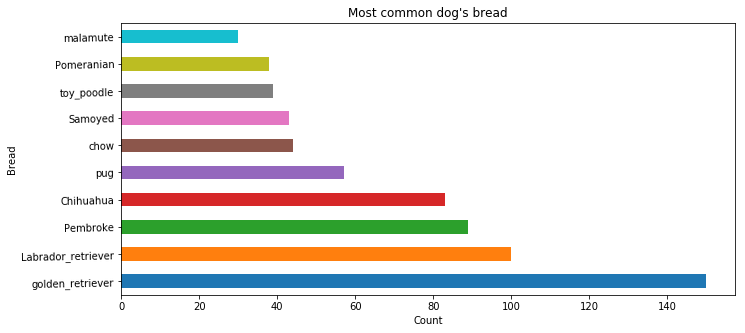

In [60]:
#df_pred.p1.value_counts().head(10)
ax = df_pred.p1.value_counts().head(10).plot.barh(x='lab', y='val', rot=1,figsize=(11,5))
ax.set_ylabel("Bread");
ax.set_xlabel("Count");
ax.set_title("Most common dog's bread");

## Evolution of retweet over time

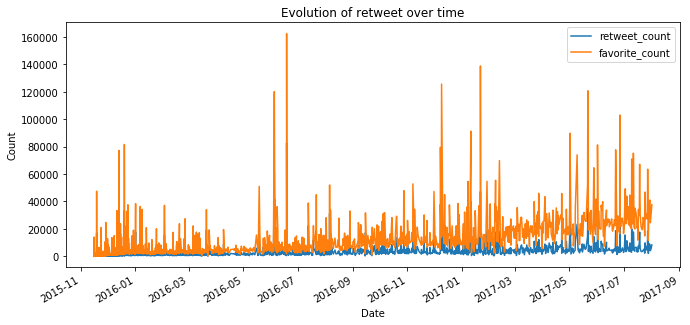

In [61]:
df_twitter_clean = df_twitter_clean.sort_values(by=['timestamp'], ascending=True)

ax = df_twitter_clean.plot(x='timestamp', y=['retweet_count', 'favorite_count'], figsize=(11,5))
ax.set_ylabel("Count");
ax.set_xlabel("Date");
ax.set_title("Evolution of retweet over time");

It's hard to see, let's compute the moving average.

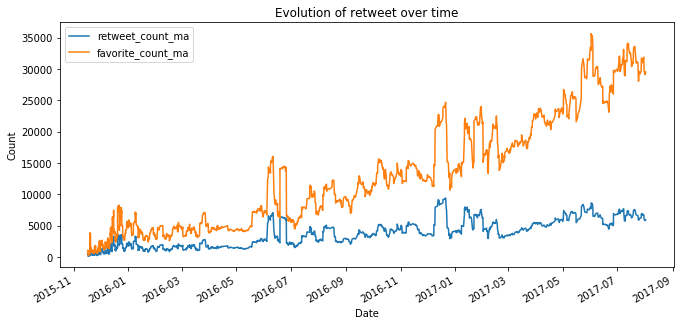

In [62]:
# Compute moving average
df_twitter_clean['retweet_count_ma'] = df_twitter_clean['retweet_count'].rolling(window=20).mean()
df_twitter_clean['favorite_count_ma'] = df_twitter_clean['favorite_count'].rolling(window=20).mean()

ax = df_twitter_clean.plot(x='timestamp', y=['retweet_count_ma', 'favorite_count_ma'], figsize=(11,5))
ax.set_ylabel("Count");
ax.set_xlabel("Date");
ax.set_title("Evolution of retweet over time");

Well it's clear that there is more interraction over time, as the account became most popular.

Retweet increase faster than favourite. I think it's a normal behaviour on Twitter.

## Which is the most famous tweet ?

Let's find the max of *retweet_count* :

In [63]:
from IPython.core.display import display, HTML
df_most_retweeted = df_twitter_clean.loc[df_twitter_clean['retweet_count'] == df_twitter_clean['retweet_count'].max()]
for tweet in df_most_retweeted['tweet_id']:
    display(HTML("<a href='https://twitter.com/dog_rates/status/"+str(tweet)+"/' target='blank'>Click here to discover the most retweeted tweet of WeRateDogs</a>"))

## Show the best rated dogs

As we have notation, name and picture, we could build a visualization of the best rated dogs of all time.

We will :

    compute the normalized notation by dividing rating_numerator by rating_denominator
    Sort by this notation
    Keep only the top rated
    Merge with df_pred
    Remove the dog without picture (Yeah that's not fair !)
    Draw a nice visualization of the 9 winners with MatPlotLib

In [64]:
#!pip install Pillow

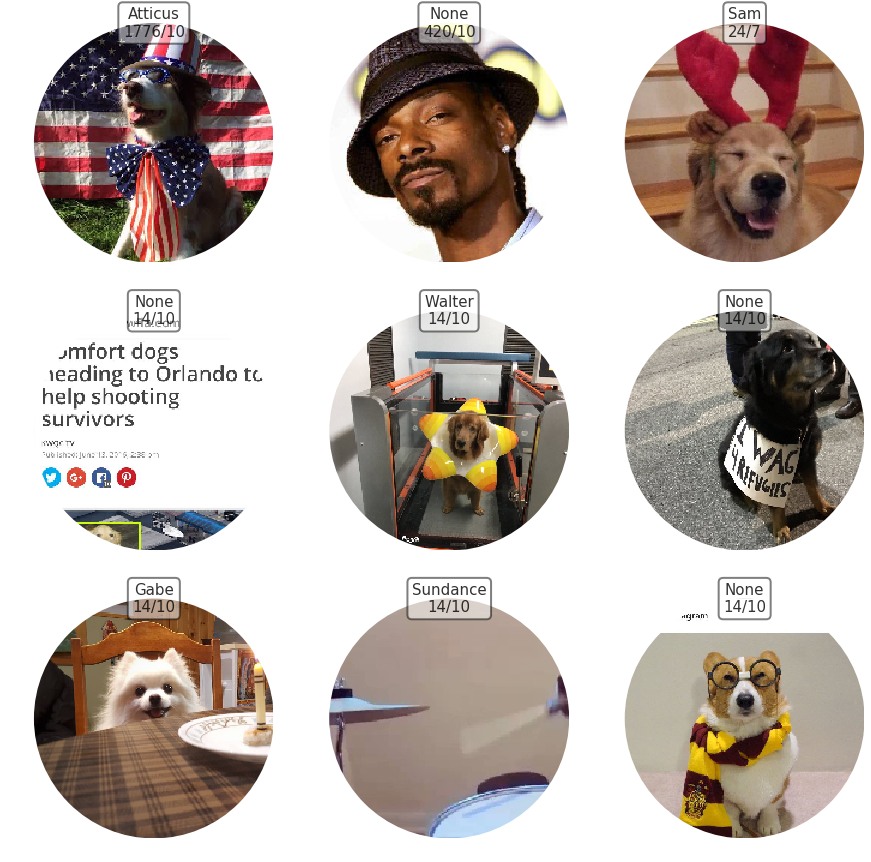

In [65]:
def compute_notation(row):
    return row['rating_numerator'] / row['rating_denominator']

df_twitter_clean['normalized_notation'] = df_twitter_clean.apply(compute_notation, axis=1)
df_best_dogs = df_twitter_clean.sort_values(by=['normalized_notation'], ascending=False)[:40]

# Find the pictures of these dog
df_best_dogs = pd.merge(df_best_dogs, df_pred[['tweet_id', 'jpg_url']], how='left', on=['tweet_id'])
#df_best_dogs.shape
# Keep only 10 dogs with picture
df_best_dogs = df_best_dogs.dropna(subset=['jpg_url'])[:10]
#df_best_dogs.shape

## Display images as HTML
from IPython.core.display import display, HTML
display(HTML("<center><h1>We Rate Dogs Hall of Fame</h1></center>"))

## Display images with MatPlotLib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sys
from PIL import Image
import urllib
fig, ax = plt.subplots(3, 3)
fig.set_size_inches(15, 15)
i = 0
x, y = 0, 0
for index, row in df_best_dogs[:9].iterrows():
    x = int(i / 3)
    y = i - x*3
    # create a file-like object from the url
    f = urllib.request.urlopen(row['jpg_url'])
    # read the image file
    image = Image.open(f)
    width, height = image.size   # Get dimensions
    # Crop to square
    image = image.crop((0, 0, min(width, height), min(width, height)))
    # Resize to 200x200
    image = image.resize((200,200))
    im = ax[x, y].imshow(image)
    image = np.asarray(image)
    # Get the center
    center = (image.shape[0]/2, image.shape[1]/2)
    # Cut a Circle
    patch = patches.Circle(xy=center, radius=min(image.shape[0],image.shape[1])/2, transform=ax[x, y].transData)
    im.set_clip_path(patch)
    # Display the name and notation
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=2, alpha=0.5)
    label = ax[x, y].annotate(row['dog_name'] + "\n" + str(int(row['rating_numerator'])) + "/" + str(int(row['rating_denominator'])),
                              xy=(image.shape[0]/2,0), fontsize=15, ha="center", va="center", bbox=bbox_props, alpha=0.8)
    # Remove axis
    ax[x, y].axis('off')
    i+=1
plt.show();

Was not easy and still some improovement needed, but pretty nice !

## Reporting for this Project

See also wrangle_report.pdf and act_report.pdf